In [1]:
# Import dependency libraries.
import pandas as pd

In [20]:
# Basic user information, data from users.dat
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
user_df = pd.read_csv('./Data/ml-1m/users.dat',
                      sep='::',
                      header=None,
                      names=unames,
                      engine='python')

# Movie information, data from movies.dat
mnames = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('./Data/ml-1m/movies.dat',
                        sep='::',
                        header=None,
                        names=mnames,
                        engine='python',
                        encoding='ISO-8859-1')

# Rating information, data from rating.dat
rnames = ['user_id', 'movie_id', 'imdbId', 'timestamp']
ratings_df = pd.read_csv('./Data/ml-1m/ratings.dat',
                         sep='::',
                         header=None,
                         engine='python',
                         names=rnames)

In [21]:
print("user information dataframe")
user_df.head()

user information dataframe


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [22]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [23]:
print("movie information dataframe")
movies_df.head()

movie information dataframe


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [25]:
print("rating information dataframe")
ratings_df.head()

rating information dataframe


,user_id,movie_id,imdbId,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [26]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   imdbId     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


Remove the year from the movies.dat data file title: Remove the year from the title by regular expression.

In [27]:
import re
patter = re.compile(r'^(.*)\((\d+)\)$')
title = {val:patter.match(val).group(1) for i,val in enumerate(set(movies_df['title']))}
movies_df['title'] = movies_df['title'].map(title)  
movies_df.head()

,movie_id,title,genres
0,1,Toy Story,Animation|Children's|Comedy
1,2,Jumanji,Adventure|Children's|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama
4,5,Father of the Bride Part II,Comedy


Convert timestamps in the ratings.dat file to a specific time: Convert timestamps to a specific time with the pd.to_datetime function in Pandas.



In [28]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'],unit='s')
ratings_df.head()

,user_id,movie_id,imdbId,timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


Change DataFrame column name: Change the column name by pandas.DataFrame.rename function, the specific code is as follows.


In [29]:
ratings_df.rename(columns={'timestamp':'time'},inplace=True)
ratings_df.tail()

,user_id,movie_id,imdbId,time
1000204,6040,1091,1,2000-04-26 02:35:41
1000205,6040,1094,5,2000-04-25 23:21:27
1000206,6040,562,5,2000-04-25 23:19:06
1000207,6040,1096,4,2000-04-26 02:20:48
1000208,6040,1097,4,2000-04-26 02:19:29


Change the time format to 'year-month-day':
1. Use the to_datetime function in Pandas to convert the date column from object format to datetime format.
2. Fetch the year, month and day from strftime('%Y%m%d'), and apply this function to the ratings_df['timestamp'] column with apply lambda.

In [30]:
import datetime
date_df = pd.DataFrame({'time':ratings_df['time']})
date_df['date']=pd.to_datetime(date_df['time'])
date_df.tail()


,time,date
1000204,2000-04-26 02:35:41,2000-04-26 02:35:41
1000205,2000-04-25 23:21:27,2000-04-25 23:21:27
1000206,2000-04-25 23:19:06,2000-04-25 23:19:06
1000207,2000-04-26 02:20:48,2000-04-26 02:20:48
1000208,2000-04-26 02:19:29,2000-04-26 02:19:29


In [31]:
ratings_df['time'] = date_df['date'].apply(lambda x:x.strftime('%Y-%m-%d'))
ratings_df.tail()

,user_id,movie_id,imdbId,time
1000204,6040,1091,1,2000-04-26
1000205,6040,1094,5,2000-04-25
1000206,6040,562,5,2000-04-25
1000207,6040,1096,4,2000-04-26
1000208,6040,1097,4,2000-04-26


Merge data: pandas.merge combines all data into one table. merge has four joins (default is inner).
1. inner connection (inner), take the intersection set
2. outer join (outer), take the concatenation, and fill with NaN;
3. Left join (left), the left DataFrame takes all, the right DataFrame takes some;
4. right join(right), right DataFrame takes all, left DataFrame takes some;


DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)

Merge movies_df and ratings_df into movies_rating_df dataset (two datasets merged).

In [35]:
# Sub-data merging
movies_ratings_df = pd.merge(ratings_df,movies_df,on='movie_id')
movies_ratings_df.head()

,user_id,movie_id,imdbId,time,title,genres
0,1,1193,5,2000-12-31,One Flew Over the Cuckoo's Nest,Drama
1,1,661,3,2000-12-31,James and the Giant Peach,Animation|Children's|Musical
2,1,914,3,2000-12-31,My Fair Lady,Musical|Romance
3,1,3408,4,2000-12-31,Erin Brockovich,Drama
4,1,2355,5,2001-01-06,"Bug's Life, A",Animation|Children's|Comedy


Merge movies_df, ratings_df & user_df into movies_rating_user_df dataset (multiple datasets merged).

In [37]:
movies_ratings_user_df = pd.merge(pd.merge(ratings_df,movies_df),user_df)
movies_ratings_user_df.head()

,user_id,movie_id,imdbId,time,title,genres,gender,age,occupation,zip
0,1,1193,5,2000-12-31,One Flew Over the Cuckoo's Nest,Drama,F,1,10,48067
1,1,661,3,2000-12-31,James and the Giant Peach,Animation|Children's|Musical,F,1,10,48067
2,1,914,3,2000-12-31,My Fair Lady,Musical|Romance,F,1,10,48067
3,1,3408,4,2000-12-31,Erin Brockovich,Drama,F,1,10,48067
4,1,2355,5,2001-01-06,"Bug's Life, A",Animation|Children's|Comedy,F,1,10,48067


### Data  Analysis

Statistical variables: Pandas provides describe function for statistical variables to see the statistics of variables in user_df.

In [38]:
user_df.describe()

,user_id,age,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


Grouping statistics: Pandas use groupby function for grouping statistics, groupby grouping is actually the original DataFrame in accordance with the groupby field for division, groupby can be added after the count (count), sum (sum), for the mean (mean) and other operations.

DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, observed=False, dropna=True)

Statistics of the 5 most rated movies: first group the movies according to their titles, then use the size function to calculate the number of samples in each group, and finally output the top 5 observations in descending order.

In [41]:
top_5_ratings_movies_df = movies_ratings_df.groupby('title').size().sort_values(ascending=False)[:5]
top_5_ratings_movies_df

title
American Beauty                                    3428
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
dtype: int64

Statistics on the mean value of movie ratings (grouped by user)

Statistics on the mean value of movie ratings (grouped by user)

In [42]:
# Mean value of ratings of movies seen by user ids
movie_ratings_by_user_mean_df= movies_ratings_df.groupby('user_id',as_index=False)['imdbId'].mean()
movie_ratings_by_user_mean_df.head()

,user_id,imdbId
0,1,4.188679
1,2,3.713178
2,3,3.901961
3,4,4.190476
4,5,3.146465


In [43]:
movie_ratings_by_user_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  6040 non-null   int64  
 1   imdbId   6040 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 94.5 KB


Counting the mean of each movie rating (grouped by movie)

In [44]:
# Mean value of each movie's rating by movie id
every_movie_ratings_mean_df= movies_ratings_df.groupby('movie_id',as_index=False)['imdbId'].mean()
every_movie_ratings_mean_df.head()


,movie_id,imdbId
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757


In [45]:
every_movie_ratings_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  3706 non-null   int64  
 1   imdbId    3706 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 58.0 KB


Grouping and aggregation statistics: Pandas provides aggregate function to realize the aggregation operation, which can be abbreviated as agg, and can be used together with groupby, the role is to group the object to make the given calculation method to re-take the value, support in accordance with the fields are given different statistical methods.
Group by movie_id and title, and calculate the average rating, take the first 5 data.

In [46]:
# Group by movie_id and title and calculate the mean of the ratings for the top 5 data. 
import numpy as np
movies_ratings_by_movie_title_df = movies_ratings_df.groupby(['movie_id','title'],as_index=False)['imdbId'].aggregate(np.mean)
movies_ratings_by_movie_title_df.head()


/var/folders/17/7chlm8ns3kx6fz2y58z03rlh0000gn/T/ipykernel_87108/1034106442.py:3: FutureWarning: The provided callable <function mean at 0x106394900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movies_ratings_by_movie_title_df = movies_ratings_df.groupby(['movie_id','title'],as_index=False)['imdbId'].aggregate(np.mean)


,movie_id,title,imdbId
0,1,Toy Story,4.146846
1,2,Jumanji,3.201141
2,3,Grumpier Old Men,3.016736
3,4,Waiting to Exhale,2.729412
4,5,Father of the Bride Part II,3.006757


Statistics of the average value of each movie rating (according to gender): pivot table pivot_table is an operation method similar to groupby, commonly used in EXCEL, pivot table according to the columns of the input data, the output, constantly subdividing the data to form a number of dimensions of the cumulative information of the two-dimensional data table.

DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)
- values ： Filter the target data, the default is all the data, you can use the values parameter to set the data columns we want to display.
- index : Row index, required parameters
- columns :Column index of the pivot table, not a required parameter, used in the same way as index.
- aggfunc :Functional operations performed when aggregating data, the default is the average, but also sum, count, etc.
- fill_value :Fill for null values
- margins :Extra columns, summation of rows and columns by default
- dropna : De-duplication is enabled by default 


In [52]:
# Getting the mean value of ratings for the same movie based on gender
mean_rating = movies_ratings_user_df.pivot_table('imdbId',index='title',columns='gender',aggfunc='mean')
mean_rating.head()


gender,F,M
title,,
"$1,000,000 Duck",3.375000,2.761905
'Night Mother,3.388889,3.352941
'Til There Was You,2.675676,2.733333
"'burbs, The",2.793478,2.962085
...And Justice for All,3.828571,3.689024


In [53]:
mean_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3664 entries, $1,000,000 Duck  to eXistenZ 
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       3439 non-null   float64
 1   M       3629 non-null   float64
dtypes: float64(2)
memory usage: 85.9+ KB


gender
F    3.620366
M    3.568879
Name: imdbId, dtype: float64


/var/folders/17/7chlm8ns3kx6fz2y58z03rlh0000gn/T/ipykernel_87108/3959010103.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movies_ratings_user_df[movies_ratings_user_df['gender'] == 'M']['imdbId'], hist=False, label='Male', color='blue')
/var/folders/17/7chlm8ns3kx6fz2y58z03rlh0000gn/T/ipykernel_87108/3959010103.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions,

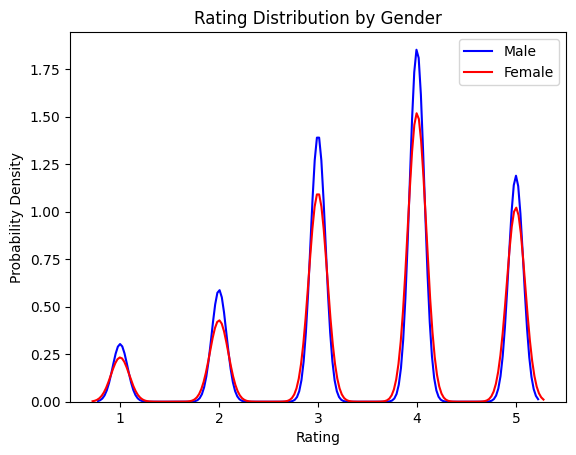

In [68]:
import seaborn as sns
# 计算不同性别的平均评分
average_rating_by_gender = movies_ratings_user_df.groupby('gender')['imdbId'].mean()
print(average_rating_by_gender)
 
# 绘制性别评分直方图
sns.distplot(movies_ratings_user_df[movies_ratings_user_df['gender'] == 'M']['imdbId'], hist=False, label='Male', color='blue')
sns.distplot(movies_ratings_user_df[movies_ratings_user_df['gender'] == 'F']['imdbId'], hist=False, label='Female', color='red')
plt.title('Rating Distribution by Gender')
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
